In [8]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC  
import pickle

In [9]:
# Oversampled Data
df_oversampled = pd.read_csv("../data/resampled/oversampled_data.csv").drop(["Unnamed: 0"], axis=1)
df_oversampled.head(10)

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,193,194,target
0,18.880061,-4.994294,8.530817,-9.332611,-1.937971,14.112943,3.051646,-0.729857,-2.752432,-4.623634,...,-0.513131,0.356183,-1.425115,1.180736,-0.025718,0.003734,-0.069990,-0.781597,-0.534617,0.0
1,18.018535,-4.411982,-5.501023,-0.608663,2.318831,-4.244598,5.012211,-6.809540,-1.524864,-6.665108,...,1.011021,-0.212266,1.359700,-1.608726,-0.242972,0.879927,0.102192,0.059700,-0.257719,0.0
2,5.753552,4.630377,2.118046,1.371330,-2.849891,-3.450770,-2.473278,2.407347,-2.680034,-1.232313,...,3.402360,-1.290986,-0.575087,0.910114,0.878836,0.414832,1.653018,-1.568800,0.057982,0.0
3,19.625465,-3.919013,-3.301671,-4.897107,1.066236,-3.324209,0.640875,1.344652,-2.727897,3.308628,...,-1.582160,0.320474,0.466842,-0.638386,-0.898458,-0.555871,-0.888306,-2.356396,-2.490211,0.0
4,8.347836,-11.055225,-7.625973,2.714140,-3.301295,-1.167390,-1.087602,0.153429,1.417243,-3.736924,...,-0.116379,-0.160098,-0.664440,-0.087544,-0.183778,0.224221,-0.355693,0.946407,0.679942,0.0
5,13.200631,-6.584079,-6.912367,-3.610110,-1.902176,-2.730864,-1.271967,0.254899,-0.699497,2.545727,...,-0.211441,0.934955,-0.026601,0.493040,0.014791,0.289944,0.585126,-1.288744,-0.146990,0.0
6,12.173522,-5.750077,-3.122149,-5.620696,-1.487291,-3.899745,-1.959703,1.055523,-0.840163,2.479718,...,-0.488258,-2.693688,1.233251,1.077838,-0.684457,0.743598,0.102782,-1.645835,-2.029369,0.0
7,5.310317,-6.276273,3.820207,9.111078,6.034002,-1.061456,-9.672827,1.295371,0.225923,1.997158,...,0.442313,0.501329,0.426498,-0.488529,-0.524402,1.148536,0.110466,-1.197591,0.560126,0.0
8,6.808834,14.323019,2.691168,-1.621573,-6.166772,-5.632995,-5.608810,2.962218,-0.192471,1.182005,...,1.061482,-0.419710,0.444109,-0.771008,-1.074159,-0.180094,0.204536,-0.631238,1.074507,0.0
9,13.433529,-9.983830,-5.626570,-2.858065,-1.743954,-2.735526,-1.372519,0.177090,-0.252239,0.143873,...,0.217436,-0.081115,1.003618,-1.141962,0.633082,-0.323377,0.134449,-0.687858,0.298180,0.0


In [10]:
# Undersampled Data
df_undersampled = pd.read_csv("../data/resampled/undersampled_data.csv").drop(["Unnamed: 0"], axis=1)
df_undersampled.head(10)

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,193,194,target
0,9.520672,-10.426676,-6.104782,2.647147,-3.113361,-1.877094,-2.359998,2.278818,1.600676,-2.396448,...,1.229301,0.069955,-0.835422,0.122478,0.064584,1.775256,-1.546339,-0.659141,0.895978,0.0
1,19.625465,-3.919013,-3.301671,-4.897107,1.066236,-3.324209,0.640875,1.344652,-2.727897,3.308628,...,-1.582160,0.320474,0.466842,-0.638386,-0.898458,-0.555871,-0.888306,-2.356396,-2.490211,0.0
2,9.741854,0.543330,3.887575,7.243629,0.099781,-1.441249,1.985987,-1.846728,-2.067276,-3.399294,...,-1.086686,-0.868464,-0.600756,0.376293,0.619421,-0.625389,0.931297,-0.041456,-0.862373,0.0
3,16.943916,-5.327857,1.698061,-3.479702,-1.624494,8.763123,2.252987,-0.744259,-4.383421,-5.198033,...,2.223409,-0.040657,-0.743231,0.219092,1.459336,1.317327,-1.052049,0.329592,1.144037,0.0
4,3.753543,-4.444411,-2.525337,10.336373,-3.509968,3.957016,-5.926953,7.870994,3.934815,-0.834145,...,-2.071532,0.940542,-1.408797,0.921555,-0.631350,1.606957,-1.158639,0.486346,-0.320635,0.0
5,15.727161,-3.247678,-3.697253,-4.090843,1.179086,-3.597200,1.056444,-1.827016,-2.820173,-0.460452,...,-0.874969,-1.029531,-0.840625,-0.253573,-0.679838,-0.152583,0.320905,0.746303,-1.150747,0.0
6,7.160728,13.684540,0.694001,-3.116596,-7.721842,-6.986336,-9.246636,6.028604,0.535942,1.323493,...,-0.524937,-0.883307,-1.038432,-0.238390,-1.269999,1.037849,1.764635,-1.160518,-0.118282,0.0
7,12.173522,-5.750077,-3.122149,-5.620696,-1.487291,-3.899745,-1.959703,1.055523,-0.840163,2.479718,...,-0.488258,-2.693688,1.233251,1.077838,-0.684457,0.743598,0.102782,-1.645835,-2.029369,0.0
8,6.064972,2.124089,3.917095,2.228577,-3.092502,2.720841,-1.642097,1.137401,-4.626911,2.303526,...,0.036856,1.642571,0.275571,-0.747554,-0.019178,0.050068,0.124153,-1.090742,-0.749581,0.0
9,9.835565,-6.322459,2.606269,-0.165837,-3.785739,5.376883,-0.100222,1.150383,-1.411530,5.621892,...,-2.996782,2.957296,0.343780,0.780498,0.151058,1.547948,-1.129203,-0.040863,-0.515431,0.0


In [11]:
def createSVCModel(title, df):
  print("=============================================================")
  print(title)
  print("=============================================================")
  # Split features and target
  X = df.drop(["target"], axis=1)
  y = df["target"]
  
  # Split train-test set with 90% train set
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=40)
  
  # Assign possible hyperparameters for SVC
  param_grid = {
    'C': [0.1,1, 10, 100],
    'gamma': [1,0.1,0.01,0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
  }
  
  # Search for best parameters for SVC, then train the dataset
  grid = GridSearchCV(SVC(), param_grid, refit=True)
  grid.fit(X_train, y_train)
  print(X_train.shape)
  
  # Print best hyperparameters tuning from GridSearchCV
  print("BEST PARAMETERS:")
  print(grid.best_estimator_)
  
  # Predict dataset from test set
  grid_predictions = grid.predict(X_test)
  
  # Get classification reports (precision, recall, and f1-score)
  print("CLASSIFICATION REPORT:")
  print(classification_report(y_test, grid_predictions))
  
  # Get confusion matrix
  cm = confusion_matrix(y_test, grid_predictions)
  cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
  cm_display.plot()
  plt.show()
  
  # Return the trained model
  return grid


OVERSAMPLED DATA
(270, 195)
BEST PARAMETERS:
SVC(C=0.1, gamma=0.01, kernel='poly')
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       1.00      1.00      1.00        16

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



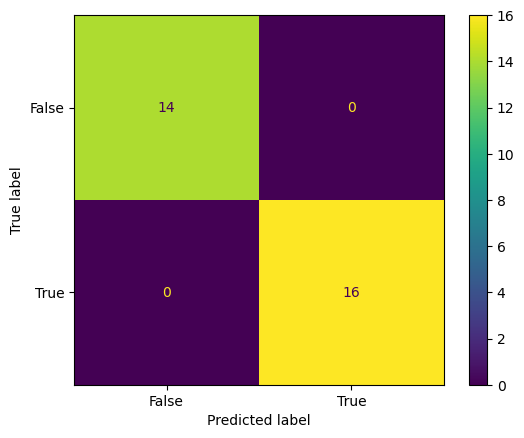

UNDERSAMPLED DATA
(140, 195)
BEST PARAMETERS:
SVC(C=1, gamma=0.001, kernel='sigmoid')
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         0.0       0.62      1.00      0.77         5
         1.0       1.00      0.73      0.84        11

    accuracy                           0.81        16
   macro avg       0.81      0.86      0.81        16
weighted avg       0.88      0.81      0.82        16



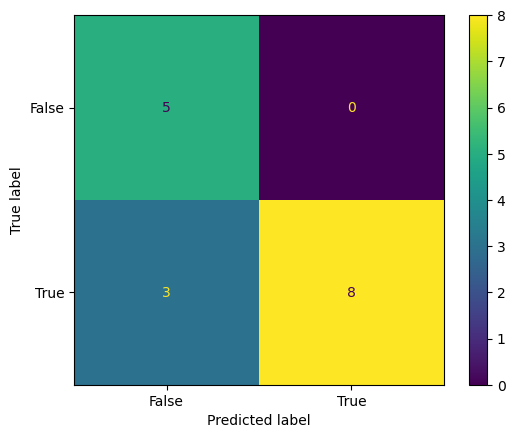

In [12]:
oversampledModel = createSVCModel("OVERSAMPLED DATA", df_oversampled)
undersampledModel = createSVCModel("UNDERSAMPLED DATA", df_undersampled)

# Evaluation

The models performs best when it is trained using oversampled data. It has reached 100% for each of the evaluation metrics.

In [13]:
# Save model to disk
pickle.dump(oversampledModel, open("../model/optimized_svc_model.pkl", 'wb'))